# Relatório Final - Reembolsos da Câmara dos Deputados


## Integrantes:
* David Pereira Galvão Junior - 20170013036
* Luan Queiroz Pereira Barbosa  - 20170011256
* Luyza Ellen Domingos do Nascimento  - 20170002257

## Introdução

A motivação em desenvolver esse trabalho advém do fato de querer investigar os gastos públicos dos deputados federais brasileiros. Cada político tem o direito a ter reembolso quando gastam seu dinheiro em atividade que permitam "servir melhor o povo". Então é importante que esses gastos sejam monitorados, para saber como cada deputados está utilizando recursos para pedir reembolso com verbas públicas.

Com as diversas notícias e acusações de corrupção dos políticos é de se imaginar que quando envolve dinheiro é provável que se vá encontrar dados suspeitos. 

Sendo assim, com os conhecimentos adquiridos durante o curso, com a utlização da linguagem Python  e com a ajuda das suas bibliotecas, o objetivo do trabalho é analisar os gastos do deputados.

## Dados Utilizados 

Foi utilizada a base de dados [Brazil's House of Deputies Reimbursements](https://www.kaggle.com/epattaro/brazils-house-of-deputies-reimbursements), disponibilizada pelo usuário epattaro do site Kaggle usando dados obtidos do portal da transparência da Câmara dos Deputados. Esta base contém informações sobre os gastos dos deputados entre os anos de 2009 e 2017.

In [1]:
import pandas as pd
from unidecode import unidecode

from IPython.display import clear_output
from concat_df import concat_df
# Carregar os dados
df = concat_df(processed=False)
df.head()

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year
0,2753519,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,411,2009
1,2753520,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,429,2009
2,2753521,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,109,2009
3,2753522,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,68,2009
4,2753523,0,2009-09-25 00:00:00,1772,PSB,SP,Abelardo Camarinha,2.418000e+12,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009


## Pré-Processamento

Realizamos o processo de limpeza e transformação de dados, sendo o processo descrito a seguir.

### Transformação de Dados

Os dados que receberam transformação foram: **establishment_name, receipt_social_security_number, receipt_date e receipt_value.** 

A coluna **establishment_name** contém valores do tipo string, o que chama atenção é o fato de que existem casos de um mesmo estabelecimento possuir mais de um nome distinto. Se utilizada a função **unique**, isso se deve por ter sido anotado, na maior parte das vezes, os nomes em alguns casos com acento e em outros sem acentos. Logo, removeremos os acentos dos nomes, com fins de um estabelecimento igual ficar com mais de um nome distinto.

Em **receipt_social_security_number** que era um atributo do tipo float foi transformado para o tipo string. Ou seja, aconteceu uma transformação de um tipo de dado. Além disso, houve um tratamento parcial para dados ausentes, um problema porém, é o que fazer para alguns dados, para determinar se estes constituem um CPF ou CNPJ.

Já com o **receipt_date**, este foi transformado para o tipo datetime pois estava como object. Com isso, foi possível extrair o mês e o dia da semana no qual o recibo foi emitido.

Por fim, o **receipt_value** possuia muitos valores pequenos, valores concatenados em uma pequena proporção de intervalo de valores. Então, foi realizado um redimensionamento para reduzir essa diferença desproporcional e para realizar uma melhor análise dos valores.

A seguir segue o código da transformação dos dados.

#### establishment_name

In [2]:
df['establishment_name'] = df['establishment_name'].apply(lambda x: unidecode(x))

#### receipt_social_security_number

In [3]:
df = df.astype({"receipt_social_security_number": str})

df.head()

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year
0,2753519,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,411,2009
1,2753520,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,429,2009
2,2753521,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,109,2009
3,2753522,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,68,2009
4,2753523,0,2009-09-25 00:00:00,1772,PSB,SP,Abelardo Camarinha,2418000000131.0,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009


Como originalmente os dados dessa coluna estavam como um ponto flutuante, acaba que os últimos caracteres sejam **'.0'**, mas vejamos se é em todos os casos:

In [4]:
df['l'] = df['receipt_social_security_number'].apply(lambda x : x.endswith('0'))

df[df['l'] == False]

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,l
34,2753553,0,2009-06-07 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,225,2009,False
35,2753554,0,2009-07-01 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,984,2009,False
36,2753555,0,2009-07-21 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,1889,2009,False
37,2753556,0,2009-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,919,2009,False
38,2753557,0,2009-07-26 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,89,2009,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251673,2050518,0,2017-05-25 11:14:52,2930,PR,RN,Zenaide Maia,nan,Postal Services,CORREIOS - ENCOMENDA PAC,20,2017,False
251674,2050519,0,2017-05-25 11:14:06,2930,PR,RN,Zenaide Maia,nan,Postal Services,CORREIOS - ENCOMENDA PAC,174,2017,False
251675,2050520,0,2017-05-29 11:53:33,2930,PR,RN,Zenaide Maia,nan,Postal Services,CORREIOS - ENCOMENDA PAC,1140,2017,False
251676,2050521,0,2017-07-06 10:57:31,2930,PR,RN,Zenaide Maia,nan,Postal Services,CORREIOS - ENCOMENDA PAC,15,2017,False


Como se vê acima, aparentemente os casos em que o número não termina com **.0** se deve ao fato do valor da coluna ser **nan**

In [5]:
df[(df['l'] == False) & (df['receipt_social_security_number'] != 'nan')]

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,l


O que se percebe é que aqueles que não terminam com  **'.0'** é pelo fato de serem **nan** antes da conversão.

In [6]:
df['receipt_social_security_number'] = df['receipt_social_security_number'].apply(lambda x : x[:-2] if x != 'nan' else x)

df['receipt_social_security_number']

0         4206050005140
1         4206050005140
2         4206050005140
3         4206050005140
4         2418000000131
              ...      
251877    2012862000160
251878    2012862000160
251879    2012862000160
251880    2012862000160
251881    2012862000160
Name: receipt_social_security_number, Length: 3014902, dtype: object

A impressão que dá é que o CNPJ ou CPF desta coluna estão com menos dígitos que o original, um CNPJ possui 14 dígitos e um CPF 11 dígitos.

Uma hipótese para isto é que CNPJs do tipo **0X.XXX.XXX/XXXX-XX,** ao serem convertidos para um número de ponto flutuante acabam tendo seus **0** à esquerda ignorados.


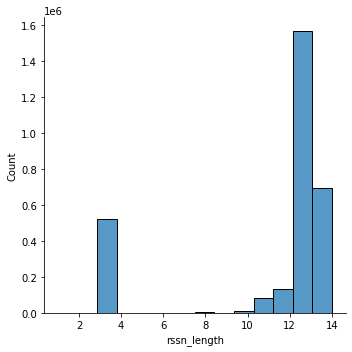

In [7]:
import seaborn as sns

df['rssn_length'] = df['receipt_social_security_number'].apply(lambda x : len(x))

sns.displot(df, x=df['rssn_length'], bins=14)

O histograma mostra que de fato uma parte dos dados possuiam **0s** à esquerda quando foram convertidos perderam parte do seu comprimento, logo, ignorando os **nan**, temos uma parte dos dados com muitos dígitos faltando, um problema são os que possuem tamanha entre 8 e 11, pois podem ser, a priori, tanto CPF quanto CNPJ, sendo necessária uma verificação adicional nestes casos. Aqueles com tamanho 12 e 13, constituem CNPJs, e portanto podem ser convertidos.

As colunas criadas para o tratamento de **receipt_social_security_number** não possuem relevância para outras tarefas, logo serão apagadas.

In [8]:
df.drop(columns=['rssn_length', 'l'], inplace=True)

#### receipt_date

In [9]:
df['receipt_date'] = pd.to_datetime(df['receipt_date'])

df['month'] = df['receipt_date'].dt.month
df['day_of_week'] = df['receipt_date'].dt.dayofweek

df.head(5)

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
0,2753519,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,4206050005140,Maintenance of Office,TIM CELULAR S/A,411,2009,5,1
1,2753520,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,4206050005140,Maintenance of Office,TIM CELULAR S/A,429,2009,5,1
2,2753521,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,4206050005140,Maintenance of Office,TIM CELULAR S/A,109,2009,5,1
3,2753522,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,4206050005140,Maintenance of Office,TIM CELULAR S/A,68,2009,5,1
4,2753523,0,2009-09-25,1772,PSB,SP,Abelardo Camarinha,2418000000131,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009,9,4


Os dados foram transformado para o tipo datetime.

#### receipt_value

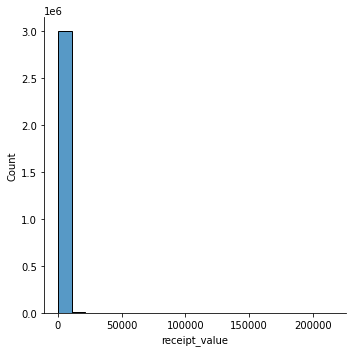

In [10]:
sns.displot(df, x="receipt_value", bins=20)

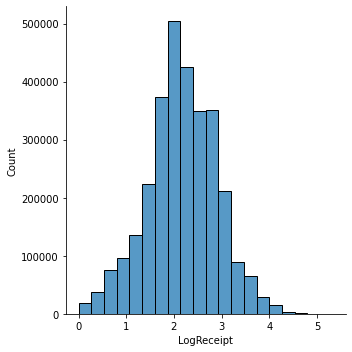

In [11]:
import numpy as np

df_receipt = df[df["receipt_value"] > 0].copy()
df_receipt["LogReceipt"] = np.log10(df_receipt["receipt_value"])
sns.displot(df_receipt, x="LogReceipt", bins=20)

In [12]:
df_receipt.sort_values("receipt_value", ascending=False).head(5)

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week,LogReceipt
34449,1479100,0,2012-12-14,292,PTB,SP,Arnaldo Faria De Sá,5511195000158,Dissemination of the Parliamentary Activity.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,215000,2012,12,4,5.332438
30802,390710,0,2014-12-19,292,PTB,SP,Arnaldo Faria De Sá,54450705000130,Dissemination of the Parliamentary Activity.,GRAFICA TRES PONTAS,208320,2014,12,4,5.318731
34364,34364,0,2013-12-27,292,PTB,SP,Arnaldo Faria De Sá,5511195000158,Dissemination of the Parliamentary Activity.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,197370,2013,12,4,5.295281
36334,724095,0,2011-12-19,292,PTB,SP,Arnaldo Faria De Sá,5511195000158,Dissemination of the Parliamentary Activity.,BALCOLOR,197000,2011,12,0,5.294466
35989,723750,0,2011-12-26,974,PT,SP,Arlindo Chinaglia,9023310000104,Dissemination of the Parliamentary Activity.,ALL WIN PROPAGANDA LTDA,194100,2011,12,0,5.288026


Foi realizado um realiza um redimesionamento para reduzir a diferença proporcional.

### Limpeza de Dados

A limpeza na base de dados envolveu procurar uma forma de preencher dados ausentes, remoção de colunas e dados duplicados. Sendo as etapas descritas a seguir.

#### Dados Faltantes

In [13]:
df.isnull().sum()

Unnamed: 0                        0
bugged_date                       0
receipt_date                      0
deputy_id                         0
political_party                   0
state_code                        0
deputy_name                       0
receipt_social_security_number    0
receipt_description               0
establishment_name                0
receipt_value                     0
year                              0
month                             0
day_of_week                       0
dtype: int64

Pela saída do método **isnull** temos que nenhum dado está faltando, mas isso é um engano, pois como visto antes, os dados em **receipt_social_security_number** que eram nan foram convertidos para a string "nan", de forma similar, vimos durante o notebook de visualização de dados que existe um estado chamado "Vazio" em **state_code**, que provavelmente serve para denotar quando não se tem a informação do estado do tal parlamentar. Vejamos mais sobre o caso de **state_code**:

In [14]:
df[df['state_code'] == 'Vazio']

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
25412,2778931,0,2009-07-25,1543,SEM PARTIDO ASSOCIADO,Vazio,Athos Avelino,7575651000159,Airline tickets,Cia Aerea - GOL,334,2009,7,5
83815,2837334,0,2009-07-07,1757,SEM PARTIDO ASSOCIADO,Vazio,Fernando Estima,7575651000159,Airline tickets,Cia Aerea - GOL,539,2009,7,1
117164,2870683,0,2009-10-15,1673,SEM PARTIDO ASSOCIADO,Vazio,João Fontes,7575651000159,Airline tickets,Cia Aerea - GOL,149,2009,10,3
154597,2908116,0,2009-08-14,681,SEM PARTIDO ASSOCIADO,Vazio,Luiz Moreira,7575651000159,Airline tickets,Cia Aerea - GOL,398,2009,8,4
154598,2908117,0,2009-08-14,681,SEM PARTIDO ASSOCIADO,Vazio,Luiz Moreira,7575651000159,Airline tickets,Cia Aerea - GOL,678,2009,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219116,2017961,0,2017-09-14,2864,SEM PARTIDO ASSOCIADO,Vazio,Sdd,23517924000165,Food and Meals,WASHINGTON KLAY CARDOSO,1850,2017,9,3
219117,2017962,0,2017-09-14,2864,SEM PARTIDO ASSOCIADO,Vazio,Sdd,23517924000165,Food and Meals,WASHINGTON KLAY CARDOSO,2000,2017,9,3
219118,2017963,0,2017-09-14,2864,SEM PARTIDO ASSOCIADO,Vazio,Sdd,23517924000165,Food and Meals,WASHINGTON KLAY CARDOSO,1600,2017,9,3
219119,2017964,0,2017-04-05,2864,SEM PARTIDO ASSOCIADO,Vazio,Sdd,31708000100,"Taxi Service, Toll & Parking",SINPETAXI,50,2017,4,2


Percebe-se que a coluna **political_party** também possui uma label para identificar a ausência de partido, contudo, o que chama a atenção é que em **deputy_name**, estão sendo utilizadas siglas, provavelmente sendo do gabinete de um partido ou algo similar. Vejamos quais são os nomes de deputados que estão associados à linhas onde o **state_code** e **political_party** assumem valores "nulos".

In [15]:
df[(df['state_code'] == 'Vazio') & (df['political_party'] == 'SEM PARTIDO ASSOCIADO')]['deputy_name'].unique()

array(['Athos Avelino', 'Fernando Estima', 'João Fontes', 'Luiz Moreira',
       'Professor Luizinho', 'Liderança Do Psdb', 'Liderança Do Pt',
       'Pdt', 'Pros', 'Sdd', 'Lid.Gov-Cd', 'Phs', 'Psol', 'Ptn',
       'Lid.Gov-Cn', 'Pode'], dtype=object)

Percebe-se que há o caso de deputados de verdade que possuem seu estado e partido ausentes, mas também, de partidos e bancadas, como é o caso de, por exemplo, Ptn. Deixaremos esses dados separados dos demais.

In [16]:
deputy_names_to_drop = ['Sdd', 'Pdt', 'Pros', 'Phs', 'Psol', 'Ptn', 'Pode', 'Liderança Do Psdb', 'Liderança Do Pt', 'Lid.Gov-Cd', 'Lid.Gov-Cn']

A função **get_na** vai nos dizer a verdadeira quantidade de dados ausentes nas colunas mencionadas anteriormente.

In [17]:
def get_na(df):
    na_deputy_name = len(df[df['deputy_name'].isin(deputy_names_to_drop)])
    na_state_code = len(df[df['state_code'] == 'Vazio'])
    na_political_party = len(df[df['political_party'] == 'SEM PARTIDO ASSOCIADO'])
    na_ssn = len(df[df['receipt_social_security_number'] == 'nan'])
    print('Dados faltantes\ndeputy_name: %d\nstate_code: %d\npolitical_party: %d\nreceipt_social_security_number: %d' % 
          (na_deputy_name, na_state_code, na_political_party, na_ssn))
    
get_na(df)


Dados faltantes
deputy_name: 3556
state_code: 3563
political_party: 3563
receipt_social_security_number: 520952


Agora vamos separar os dados dos partidos/bancadas e dos deputados:

In [18]:
df_parties = df[df['deputy_name'].isin(deputy_names_to_drop)]

df = df[(~df['deputy_name'].isin(deputy_names_to_drop)) | (df['state_code'] != 'Vazio') | (df['political_party'] != 'SEM PARTIDO ASSOCIADO')]

get_na(df)
print('\n')
get_na(df_parties)


Dados faltantes
deputy_name: 0
state_code: 7
political_party: 7
receipt_social_security_number: 520952


Dados faltantes
deputy_name: 3556
state_code: 3556
political_party: 3556
receipt_social_security_number: 0


In [19]:
print(len(df_parties))

3556


Percebe-se que todas as linhas de **df_parties** não possuem valores para **state_code** e **political_party**, mas é de se esperar, uma vez que um partido não tem estado ou não, e o partido está incluso no nome. Uma ressalva é que apesar da função acusar a falta de dados em **deputy_name**, isso ocorre para ela assumir como ausência de dados nessa coluna quando o nome é de um partido.

Em relação aos deputados vejamos os casos.


In [20]:
df[(df['state_code'] == 'Vazio') | (df['political_party'] == 'Vazio')]

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
25412,2778931,0,2009-07-25 00:00:00,1543,SEM PARTIDO ASSOCIADO,Vazio,Athos Avelino,7575651000159,Airline tickets,Cia Aerea - GOL,334,2009,7,5
83815,2837334,0,2009-07-07 00:00:00,1757,SEM PARTIDO ASSOCIADO,Vazio,Fernando Estima,7575651000159,Airline tickets,Cia Aerea - GOL,539,2009,7,1
117164,2870683,0,2009-10-15 00:00:00,1673,SEM PARTIDO ASSOCIADO,Vazio,João Fontes,7575651000159,Airline tickets,Cia Aerea - GOL,149,2009,10,3
154597,2908116,0,2009-08-14 00:00:00,681,SEM PARTIDO ASSOCIADO,Vazio,Luiz Moreira,7575651000159,Airline tickets,Cia Aerea - GOL,398,2009,8,4
154598,2908117,0,2009-08-14 00:00:00,681,SEM PARTIDO ASSOCIADO,Vazio,Luiz Moreira,7575651000159,Airline tickets,Cia Aerea - GOL,678,2009,8,4
209868,2963387,0,2009-10-18 01:00:00,1410,SEM PARTIDO ASSOCIADO,Vazio,Professor Luizinho,7575651000159,Airline tickets,Cia Aerea - GOL,1105,2009,10,6
209869,2963388,0,2009-10-22 00:00:00,1410,SEM PARTIDO ASSOCIADO,Vazio,Professor Luizinho,7575651000159,Airline tickets,Cia Aerea - GOL,4,2009,10,3


Os deputados Athos Avelino, Fernando Estima, João Fontes, Luiz Moreira, e Professor Luizinho, possuem dados de estado e partido faltantes. Por meio de uma pesquisa no site da [Câmara dos Deputados](https://www.camara.leg.br), foi possível preencher manualmente os dados faltantes.

In [21]:
fill_dict = {'Athos Avelino': ['PPS', 'MG'],
             'Fernando Estima': ['PL', 'SP'],
             'João Fontes': ['PT', 'SE'],
             'Luiz Moreira': ['PFL', 'BA'],
             'Professor Luizinho': ['PT', 'SP']
}

for (key, val) in fill_dict.items():
    df.loc[df['deputy_name'] == key, 'political_party'] = val[0]
    df.loc[df['deputy_name'] == key, 'state_code'] = val[1]

get_na(df)


Dados faltantes
deputy_name: 0
state_code: 0
political_party: 0
receipt_social_security_number: 520952


Como vimos, após uma análise mais cuidadosa dos dados, não foram encontradas colunas com valores **nan** ou **none**, porém notamos que as colunas **political_party** e **state_code** possuem valores "SEM PARTIDO ASSOCIADO" e "Vazio", enquanto que a coluna **deputy_name** em algumas instâncias se encontram com nomes de partidos, o que não é interessante para a análise que foi proposta de avaliar os gastos de deputados. Esse cojunto de valores para uma mesma instância impossibilita a identificação do deputado a qual se refere, portanto foi decidido que não valeria a pena manter essas informações na tabela.

Também foram encontrados valores de string **nan** para a coluna de **receipt_social_security_number**, porém a falta dessa informação não atrapalha na avaliação dos dados, então foi decidido manter tais instâncias.

#### Remoção de Colunas

A coluna **Unnamed: 0** não parece ter uma informação útil, e portanto será removida.

In [22]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df_parties.drop(columns=['Unnamed: 0'], inplace=True)

#### Dados duplicados

In [23]:
df[df.duplicated(keep=False)]

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
172,0,2009-12-15,1772,PSB,SP,Abelardo Camarinha,7575651000159,Airline tickets,Cia Aerea - GOL,4,2009,12,1
173,0,2009-12-15,1772,PSB,SP,Abelardo Camarinha,7575651000159,Airline tickets,Cia Aerea - GOL,957,2009,12,1
181,0,2009-10-27,1772,PSB,SP,Abelardo Camarinha,7575651000159,Airline tickets,Cia Aerea - GOL,387,2009,10,1
182,0,2009-10-27,1772,PSB,SP,Abelardo Camarinha,7575651000159,Airline tickets,Cia Aerea - GOL,387,2009,10,1
183,0,2009-10-30,1772,PSB,SP,Abelardo Camarinha,7575651000159,Airline tickets,Cia Aerea - GOL,294,2009,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251781,0,2017-02-06,2930,PR,RN,Zenaide Maia,2575829000148,Airline tickets,Cia Aerea - AVIANCA,80,2017,2,0
251782,0,2017-02-13,2930,PR,RN,Zenaide Maia,2575829000148,Airline tickets,Cia Aerea - AVIANCA,80,2017,2,0
251783,0,2017-02-13,2930,PR,RN,Zenaide Maia,2575829000148,Airline tickets,Cia Aerea - AVIANCA,80,2017,2,0
251785,0,2017-03-13,2930,PR,RN,Zenaide Maia,2575829000148,Airline tickets,Cia Aerea - AVIANCA,80,2017,3,0


In [24]:
df_parties[df_parties.duplicated(keep=False)]

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
216424,0,2011-10-28,2439,SEM PARTIDO ASSOCIADO,Vazio,Liderança Do Pt,3606027000110,"Consultancies, Researches and Technical Works.",AGAPE INFORMATICA,1000,2011,10,4
216425,0,2011-10-28,2439,SEM PARTIDO ASSOCIADO,Vazio,Liderança Do Pt,3606027000110,"Consultancies, Researches and Technical Works.",AGAPE INFORMATICA,1000,2011,10,4
198918,0,2012-09-13,2442,SEM PARTIDO ASSOCIADO,Vazio,Liderança Do Psdb,2449992000164,Telephony,VIVO,275,2012,9,3
198920,0,2012-09-13,2442,SEM PARTIDO ASSOCIADO,Vazio,Liderança Do Psdb,2449992000164,Telephony,VIVO,275,2012,9,3
198954,0,2012-03-22,2442,SEM PARTIDO ASSOCIADO,Vazio,Liderança Do Psdb,7033375000105,Food and Meals,IRENE R DE MACEDO EPP,50,2012,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191882,0,2017-09-11,2715,SEM PARTIDO ASSOCIADO,Vazio,Pdt,26421230000118,Dissemination of the Parliamentary Activity.,HMP COMUNICACAO LTDA,7300,2017,9,0
195618,0,2017-09-06,3172,SEM PARTIDO ASSOCIADO,Vazio,Pode,3346671000954,Food and Meals,TAIOBA SELF-SERVICE LTDA-EPP,324,2017,9,2
195619,0,2017-09-06,3172,SEM PARTIDO ASSOCIADO,Vazio,Pode,3346671000954,Food and Meals,TAIOBA SELF-SERVICE LTDA-EPP,324,2017,9,2
219113,0,2017-08-08,2864,SEM PARTIDO ASSOCIADO,Vazio,Sdd,23517924000165,Food and Meals,WASHINGTON KLAY CARDOSO,2000,2017,8,1


Percebe-se que ambas as bases de dados possuem dados duplicados que serão removidos, com exceção da primeira ocorrência do dado duplicado.

In [25]:
print('len(df) = %d, len(df_parties) = %d' % (len(df), len(df_parties)))
df.drop_duplicates(keep='first', inplace=True)
df_parties.drop_duplicates(keep='first', inplace=True)
print('len(df) = %d, len(df_parties) = %d' % (len(df), len(df_parties)))

len(df) = 3011346, len(df_parties) = 3556
len(df) = 2841668, len(df_parties) = 3478


Como resultado ambas as bases tiveram uma redução no seu tamanho, em linhas.

## Perguntas

Foram elaboradas no total sete perguntas para serem respondidas com o conjunto de dados apresentado anteriormente, sendo estas perguntas apresentadas a seguir.

### 1. Qual seria a média dos valores dos recibos para 2021? 

<AxesSubplot:xlabel='year', ylabel='receipt_value'>

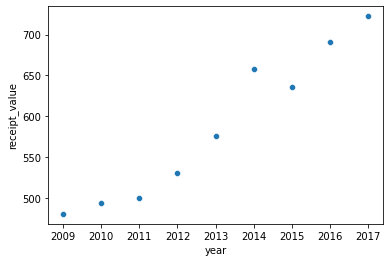

In [26]:
import matplotlib.pyplot as plt

dft = df.groupby('year').mean()

sns.scatterplot(data=dft, x='year', y='receipt_value')

In [27]:
from scipy.stats import linregress

regress = linregress(dft.index, dft['receipt_value'])

a = regress.slope
b = regress.intercept

def predict(year):
    return year * a + b

In [28]:
np.corrcoef(dft.index, dft['receipt_value'])

array([[1.        , 0.97342821],
       [0.97342821, 1.        ]])

Text(0.5, 0, 'Ano')

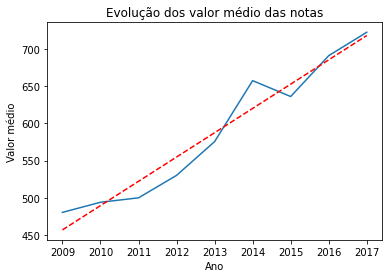

In [29]:
yhat = [predict(year) for year in range(2009, 2018)]

plt.plot(dft.index, dft['receipt_value'])
plt.plot(dft.index, yhat, 'r--')
plt.title('Evolução dos valor médio das notas')
plt.ylabel('Valor médio')
plt.xlabel('Ano')

In [30]:
predict(2021)

848.8315043215043

Como se percebe há uma correlação muito forte entre o ano e o valor médio dos recibos. Por meio de uma regressão linear, podemos obter uma boa estimativa de quanto será o valor médio do recibo neste ano de 2021, no caso, o valor obtido foi de aproximadamente **R$ 848**. Curiosamente, este valor seria um incremento de cerca de 11% em relação ao que foi registrado em 2017, enquanto que, a inflação no período tem sido, segundo o IPCA, perto de 17%.

### 2. Existem deputados que são outliers com relação a gastos com gasolina? Se sim, quais? 

<AxesSubplot:>

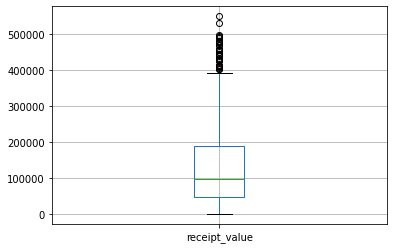

In [31]:
df_fuel = df.loc[df['receipt_description'] == 'Fuels and lubricants.']
df_fuel = df_fuel.groupby('deputy_name').sum()
df_fuel.boxplot(column='receipt_value')

Pelo *boxplot* percebe-se que o volume de gastos por deputados para esta categoria tem uma mediana em aproximadamente **R\$ 100.000,00**, e há a presença de vários outliers, todos com valores de gastos acima do limite superior que é cerca de **R$ 400.000,00**.

Vejamos o caso dos deputados com gastos acima de **R$ 400.000,00** em combustíveis:

In [32]:
df_outliers = df_fuel[df_fuel['receipt_value'] > 400000]
df_outliers['receipt_value']

deputy_name
Aelton Freitas             470906
Aníbal Gomes               414394
Assis Do Couto             429928
Claudio Cajado             427742
Daniel Almeida             428248
Décio Lima                 401941
Edio Lopes                 404699
Flaviano Melo              478069
Geraldo Resende            403970
Givaldo Carimbão           470643
Gonzaga Patriota           530738
Gorete Pereira             445578
Jaime Martins              495759
Jefferson Campos           489743
José Airton Cirilo         490817
José Carlos Araújo         455045
Jovair Arantes             549163
João Campos                478549
João Carlos Bacelar        454473
Júlio Cesar                480298
Lincoln Portela            455119
Lázaro Botelho             450604
Lúcio Vale                 410133
Manoel Junior              412220
Marcos Montes              410339
Mauro Lopes                480662
Nelson Marquezelli         469825
Nelson Meurer              474770
Osmar Serraglio            442603
Pa

In [33]:
print(len(df_outliers))

36


Existem ao todo 36 deputados que podemos considerar como outliers em gastos nessa categoria. Vejamos os estados destes:

In [34]:
states = []
for deputy in df_outliers.index:
    states.append(df.loc[df['deputy_name'] == deputy, 'state_code'].unique()[0])
    
df_outliers['state'] = states

<ipython-input-34-0c7c90171bb3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['state'] = states


In [35]:
counts = df_outliers['state'].value_counts()
counts_df = pd.DataFrame({'state': counts.index, 'count': counts.values})

<AxesSubplot:xlabel='state', ylabel='count'>

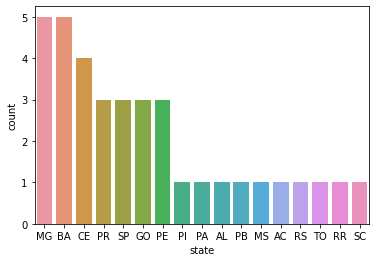

In [36]:
sns.barplot(data=counts_df, x='state', y='count')

Percebe-se a presença de deputados de 17 estados diferentes, de todas as regiões do país, o estado de Minas Gerais e a Bahia são o que possuem o maior número de deputados que podem ser considerados outliers, com 5 cada.

### 3. Qual empresa de combustível recebeu mais? Existe alguma relação com possíveis outliers da análise anterior? 

In [37]:
df_fuel_establishment = df.loc[df['receipt_description'] == 'Fuels and lubricants.']
df_fuel_establishment = df_fuel_establishment.groupby('establishment_name').sum()
df_fuel_establishment.sort_values(by='receipt_value', ascending=False)['receipt_value'].head()

establishment_name
CASCOL COMBUSTIVEIS PARA VEICULOS LTDA            2858271
POSTO TOCANTINS LTDA                               962593
POSTO HOMERO CASTELO BRANCO LTDA                   651180
POSTOS MATARIPE ABASTECIMENTOS E SERVICOS LTDA     642045
SAO JOAO POSTOS DE ABASTECIMENTOS E SERVICOS       602538
Name: receipt_value, dtype: int64

Como pode ser visto através da organização dos dados filtrados pelos gastos em combustíveis, a empresa que mais recebeu dinheiro foi a **CASCOL COMBUSTIVEIS PARA VEICULOS LTDA**, que pode-se notar ter recebido um valor exorbitantemente maior se comparado ao segundo lugar. Após pesquisa, foi constatado que tal posto se localiza em Brasília, então pode-se deduzir uma ligação entre tais gastos e a localização da Câmara dos Deputados, ainda assim, é algo que chama a atenção.

<AxesSubplot:>

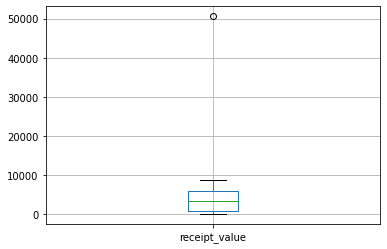

In [38]:
df_relation = df.loc[(df['deputy_name'].isin(df_outliers.index)) & (df['establishment_name'] == 'CASCOL COMBUSTIVEIS PARA VEICULOS LTDA')]
df_relation = df_relation.groupby('deputy_name').sum()
df_relation.boxplot(column='receipt_value')

In [39]:
df_relation.loc[df_relation['receipt_value'] > 10000]

,bugged_date,deputy_id,receipt_value,year,month,day_of_week
deputy_name,,,,,,
Gonzaga Patriota,0,9179,50618,135059,403,130


Através do boxplot dos dados onde se encontram apenas os gastos dos deputados considerados outliers em gastos com combustível nesse estabelecimento específico (citado anteriormente), somos capazes de identificar apenas um outlier entre estes, com um gasto muito superior ao padrão. Ao investigarmos quem foi esse outlier, identificou-se **Gonzaga Patriota** como autor de compras que totalizaram **R$ 50618 reais**, o que representa cerca de 10% do total gasto por ele nessa categoria (como constatado na questão anterior), porém dado o tamanho das compras que ele fez nesse posto em comparação com outros, é algo que necessita uma certa atenção.

### 4. Existem estabelecimentos com compras de apenas um deputado? 

In [47]:
establishment_counts = df['establishment_name'].value_counts() 

In [52]:
one_time_establishment = establishment_counts[establishment_counts.values == 1].index.to_list()

In [82]:
search_df = df[~df['establishment_name'].isin(one_time_establishment)]
unique_establishment_name = search_df['establishment_name'].unique()

one_deputy_establishment = []

i = 0
total = len(unique_establishment_name)

for establishment in unique_establishment_name:
    i += 1
    print('%d/%d' % (i, total))
    clear_output()
    if len(search_df.loc[search_df['establishment_name'] == establishment, 'deputy_name'].unique()) == 1:
        one_deputy_establishment.append(establishment)

In [61]:
establishment_list = one_deputy_establishment + one_time_establishment
len(establishment_list)

131518

Existem ao todo 131.518 estabelescimentos que tiveram compras de apenas um deputado, porém, em alguns casos, são estabelescimentos que só aparecem em uma única compra. Vejamos se existem outliers em relação ao volume de compras.

<AxesSubplot:>

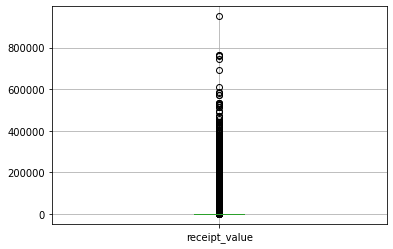

In [64]:
est_group = df[df['establishment_name'].isin(establishment_list)].groupby('establishment_name').sum()
est_group.boxplot(column='receipt_value')

Percebe-se pelo boxplot um grande número de outliers, contudo, como grande parte dessses estabelecimentos possuem um volume de vendas baixo (i.e. só venderam uma vez na base de dados), a mediana tende a ser baixa. Vejamos o caso de quem vendeu mais de **R$ 600.000,00**:

In [81]:
top_est = est_group[est_group['receipt_value'] > 600000].index.to_list()

for top in top_est:
    print('Estabelescimento:', top, 
          '\nCategoria:', df[df['establishment_name'] == top]['receipt_description'].unique(),
          '\nVolume: R$', est_group.loc[top]['receipt_value'],
          '\nDeputado(a) comprador:', df[df['establishment_name'] == top]['deputy_name'].unique())

Estabelescimento: ADMINISTRADORA IMOBILIARIA ASSIS LTDA 
Categoria: ['Maintenance of Office' 'Publication Subscription'] 
Volume: R$ 766503 
Deputado(a) comprador: ['Magda Mofatto']
Estabelescimento: ADVOCACIA ROGERIO AVELAR S/C 
Categoria: ['Consultancies, Researches and Technical Works.'] 
Volume: R$ 746000 
Deputado(a) comprador: ['Aureo']
Estabelescimento: AMV GRAFICA LTDA 
Categoria: ['Dissemination of the Parliamentary Activity.'] 
Volume: R$ 692596 
Deputado(a) comprador: ['João Campos']
Estabelescimento: Book Servicos Graficos Ltda 
Categoria: ['Dissemination of the Parliamentary Activity.'] 
Volume: R$ 759350 
Deputado(a) comprador: ['José Rocha']
Estabelescimento: LOCAL NEGOCIOS IMOBILIARIOS LTDA 
Categoria: ['Maintenance of Office'] 
Volume: R$ 763614 
Deputado(a) comprador: ['Guilherme Mussi']
Estabelescimento: MATHEUS & MENDES SOCIEDADE DE ADVOGADOS 
Categoria: ['Consultancies, Researches and Technical Works.'] 
Volume: R$ 950132 
Deputado(a) comprador: ['Beto Mansur']
Est

Percebe-se que a empresa que mais recebeu recursos desse tipo é um escritório de advocacia, porém existe outro escritório que figura entre os mais remunerados, ainda, existem empresas gráficas que receberam um bom volume e só foram contratadas por um deputado(a), além de duas imobiliárias, e uma empresa que oferece serviço de aluguel de motos. Ainda, nenhum deputado aparece mais de uma vez como comprador destes estabelecimentos.

### 5. Qual deputado tem a maior média de gastos? 

In [45]:
dft = df.groupby('deputy_name').mean()
dft.sort_values(by='receipt_value', ascending=False)['receipt_value'].head()

deputy_name
Adão Pretto         17700.000000
Armando Vergílio     3159.963889
Lucas Vergilio       3118.405405
Renato Cozzolino     2729.500000
Altineu Côrtes       2721.387755
Name: receipt_value, dtype: float64

In [46]:
df.loc[df['deputy_name'] == 'Adão Pretto'] 

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
1730,0,2009-01-15,846,PT,RS,Adão Pretto,7141271000106,Dissemination of the Parliamentary Activity.,PONTOCOM GRAFICA E EDITORA,17700,2009,1,3


Como pode ser visto através da ordenação de maneira decrescente do dataframe a partir da média dos valores dos recibos de cada deputado, o deputado com maior média de gastos foi o **Adão Pretto**. O curioso é que esse deputado possui apenas um recibo cadastrado em todo o dataframe. Após pesquisas, constatamos que [tal deputado foi a óbito aproxidamente um mês depois da data do recibo](https://pt.wikipedia.org/wiki/Adão_Pretto).

### 6. Qual foi o deputado que mais gastou em ano eleitoral? 

In [47]:
deputy_election_years = [2010, 2014] # Anos que houveram eleições para deputado federal
local_election_years = [2012, 2016] # Anos que houveram eleições para prefeito e vereador

df_deputy = df.loc[df['year'].isin(deputy_election_years)]
df_deputy = df_deputy.groupby('deputy_name').sum()
df_deputy = df_deputy.sort_values(by='receipt_value', ascending=False).head()
df_deputy['receipt_value']

deputy_name
Bruno Araújo      1021203
Edio Lopes         985666
Gladson Cameli     980001
Paes Landim        936326
Silas Câmara       935034
Name: receipt_value, dtype: int64

In [48]:
df_local = df.loc[df['year'].isin(local_election_years)]
df_local = df_local.groupby('deputy_name').sum()
df_local = df_local.sort_values(by='receipt_value', ascending=False).head()
df_local['receipt_value']

deputy_name
Felipe Bornier    1175485
Edio Lopes        1124023
Paes Landim       1039567
Fábio Faria       1021506
Flaviano Melo     1007227
Name: receipt_value, dtype: int64

In [49]:
df_final = df.loc[df['year'].isin(deputy_election_years + local_election_years)]
df_final = df_final.groupby('deputy_name').sum()
df_final = df_final.sort_values(by='receipt_value', ascending=False).head()
df_final['receipt_value']

deputy_name
Edio Lopes        2109689
Felipe Bornier    2060048
Paes Landim       1975893
Silas Câmara      1929109
Zé Geraldo        1891848
Name: receipt_value, dtype: int64

Para melhor análise, foi feita a avaliação dos maiores gastos nos anos eleitorais para deputados (2010 e 2014), para prefeitos (2012 e 2016) e por fim de todos os 4 anos juntos. Como pode ser visto nas ordenações de maior para menor dos dataframes expostos, o deputado com maior gasto em anos eleitorais que envolvem eleições de deputados foi **Bruno Araújo**, já nos anos eleitorais que envolvem eleições para prefeitos foi **Felipe Bornier** e por fim em todos os 4 anos eleitorais no período estudado o deputado que mais gastou foi **Edio Lopes**. É interessante notar como Edio aparece entre os dois primeiros lugares em todos os casos.

Ainda, vejamos se há algum padrão entre esses deputados em relação aos seus estados.

In [50]:
print(df.loc[df['deputy_name'].isin(df_deputy.index[:5]), 'state_code'].unique(),
df.loc[df['deputy_name'].isin(df_local.index[:5]), 'state_code'].unique(),
df.loc[df['deputy_name'].isin(df_final.index[:5]), 'state_code'].unique())

['PE' 'RR' 'AC' 'PI' 'AM'] ['RR' 'RN' 'RJ' 'AC' 'PI'] ['RR' 'RJ' 'PI' 'AM' 'PA']


Para os três casos o que se percebe é a presença de deputados da região Norte e Nordeste, porém, para o caso de anos com eleições de deputados, ou também se observado todos os anos eleitorais, há a presença de um deputado do Sudeste, ainda, nota-se a ausência de deputados da região Centro-Oeste e Sul entre os mais que mais gastam nestes anos. Note que, os deputados do estado de Roraima (RR), Amazonas (AM) possuem as duas maiores médias de valor gasto por recibo, enquanto que os deputados do Rio de Janeiro (RJ) não figuram entre aqueles com a maior médio de valor gasto por recibo:

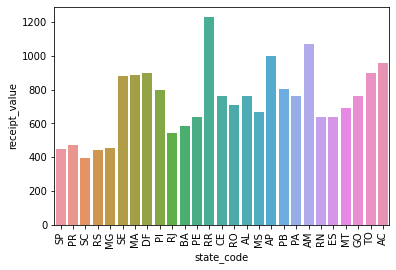

In [51]:
bar_plot = sns.barplot(data=df, x="state_code", y="receipt_value", ci=None)

for item in bar_plot.get_xticklabels():
    item.set_rotation(90)

### 7. Qual é a categoria onde os gastos são maiores? E qual é a categoria onde os gastos são menores?

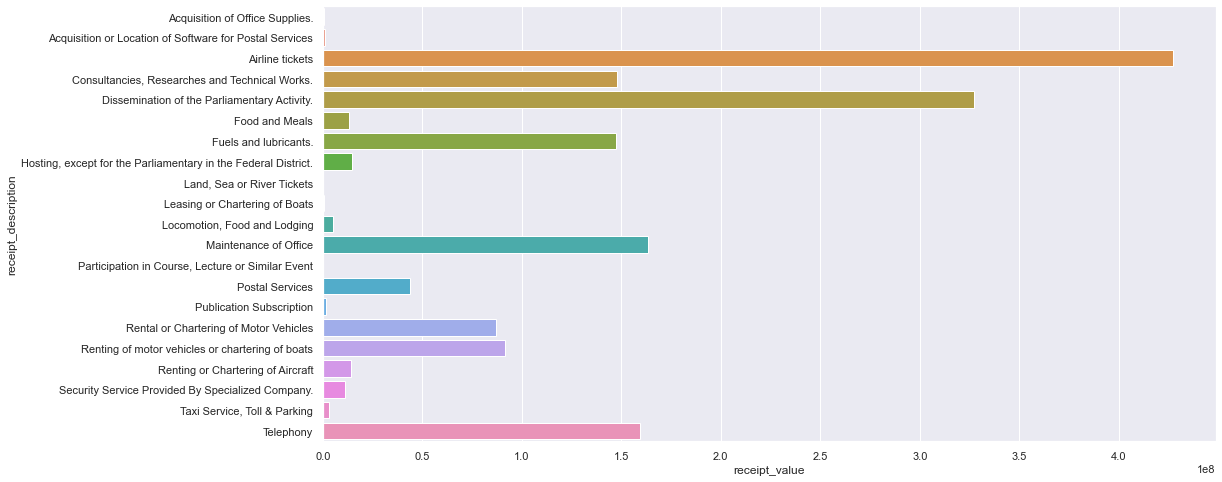

In [52]:
dfg = df.groupby('receipt_description').sum()
sns.set(rc = {'figure.figsize':(16, 8)})


bar_plot = sns.barplot(data=dfg, y=dfg.index, x='receipt_value')

Pelo gráfico, podemos visualizar que a categoria **Airline tickets** (passagens áreas) é que teve o maior volume de gastos, com aproximadamente **R$ 425.000.000,00**, contudo, determinar a categoria com o menor volume de gastos pelo gráfico é um literalmente um teste ótico. Vejamos a seguir quem foi a menor:

In [53]:
dfg.sort_values(by='receipt_value', ascending=True)['receipt_value'][:3]

receipt_description
Land, Sea or River Tickets                           343647
Participation in Course, Lecture or Similar Event    344494
Leasing or Chartering of Boats                       484181
Name: receipt_value, dtype: int64

Pela tabela acima, temos que a categoria **Land, Sea or River Tickets** possui o menor volume de gastos, porém é quase um empate com a categoria **Participation in Course, Lecture or Similar Event**, dada a característica da primeira categoria, e a categoria de maiores gastos, pode-se notar que definitivamente os deputados preferem viajar de avião à utilizar outros meios de transporte.

## Conclusão

Portanto, a partir da resolução das perguntas propostas, pode-se notar que os deputados gastam bastante com gasolina, no entanto não é categoria em que os gastos são maiores, sendo esta a de **Passagens Aéreas** (**Airline tickets**). O volume de gasto nessa categoria foi cerca de **R\$ 425.000.000,00** no período. Dentre as categorias em que os deputados menos gastam, estão: **Land, Sea or River Tickets ,Participation in Course, Lecture or Similar Event** e **Leasing or Chartering of Boats**.

Na categoria de **Fuels and lubricants**, que é basicamente gastos com combustíveis, notou-se que 36 deputados obtiveram gastos superiores ao valor de **R\$ 400.000,00**, e sendo 5 deputados do estado de Minas Gerias e 5 da Bahia. Na busca de encontrar respostas para descobrir qual seria o posto de combustíveis que mais recebeu dinheiro, encontramos que foi o posto **CASCOL COMBUSTIVEIS PARA VEICULOS LTDA**, do qual é situado em Brasília. Pode-se deduzir que isso acontece devido à proximidade física dele com a Câmara dos Deputados e a cidade. Dentre os 36 deputados, o que mais gastou nesse estabelecimento foi o deputado Gonzaga Patriota, eleito pelo estado de Pernambuco. No caso deste deputado, do total de gastos que ele teve com combustíveis, cerca de 10% foi nesse estabelecimento, o que é algo muito peculiar. 

Ao analisar estabelecimentos que possuiam apenas compras de um deputado, foram detectados milhares de casos, contudo, o que chama a atenção é a maior parte possuir um pequeno volume enquanto há um grupo com um alto volume de gastos, entre estes "campeões", foram encontrados gastos com escritórios de advocacia, empresas que oferecem serviço de aluguel de motos, além de duas imobiliárias. As categorias destes gastos estão entre as que os deputados mais gastam, porém causa estranheza neste caso, não ter sido optado por um fornecedor mais estabelecida (i.e. que também fornece estes serviços para outros parlamentares).

É de se esperar que em anos eleitorais deputados irão gastar mais recursos financeiros, uma vez que é época das suas próprias campanhas ou de aliados. Foi encontrado que nos anos eleitorias de eleição federal, logo que envolve eleições para deputados, os deputados que mais gastaram foram  **Bruno Araújo e  Edio Lopes**. Já nas eleições municipais foram **Felipe Bornier e Edio Lopes**. Quando se olha os estados dos deputados que mais gastam nestes anos, tem-se que políticos de **Roraima(RR) e Amazonas(AM)** aparecem entre os primeiros em todos os anos, ainda, há a ausência de deputados da região Centro-Oeste e Sul entre os que mais gastam em anos eleitorais.

Uma limitação que encontramos foi em relação que a maior parte dos dados da base de dados utilizada serem categóricos, o que limitou muito realizar operações que poderiam envolver o agrupamento de dados. Para melhorias, seria interessante procurar adicionar em outra fonte, dados numéricos para serem incorporados à base de dados, por outro lado, outra melhoria seria a atualização da base, pois a mesma está desatualizada, sendo os dados do período de 2009-2017, e portanto, não possui informações dos gastos dos deputados que estão exercendo o mandato atualmente.

Por fim, a partir deste trabalho, pode-se perceber que quando investigados os gastos de deputados irão surgir informações e conjecturas suspeitas, além disso, é possível identificar padrões dos gastos dos parlamentares, como por exemplo, o tipo de maior gasto. Por conseguinte, conclui-se que é necessário investigar as despesas dos deputados, pois há casos onde estes estão gastando quantias exorbitantes em estabelecimentos, produtos ou serviços. Um futuro trabalho que poderia ser relizado seria o de concatenar todas esses dados analisados e criar um dashboard para ser disponibilizado para acesso ao público em geral. Ou seja, criar uma aplicação com o objetivo de fiscalização de gastos dos políticos. 